In [2]:
!pip install textblob

In [3]:
import nltk
nltk.download('punkt')  # For sentence tokenization
nltk.download('averaged_perceptron_tagger')  # For POS tagging
nltk.download('wordnet')  # For word definitions and synonyms

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [4]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df= pd.read_csv('twitter_training.csv')

In [6]:
df.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [7]:
df.columns

Index(['2401', 'Borderlands', 'Positive',
       'im getting on borderlands and i will murder you all ,'],
      dtype='object')

In [8]:
df.columns=['ID','Entity','Sentiments','Contest']
df.head()

,ID,Entity,Sentiments,Contest
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [9]:
df.shape

(74681, 4)

In [10]:
df.describe(include='all')

,ID,Entity,Sentiments,Contest
count,74681.000000,74681,74681,73995
unique,NaN,32,4,69490
top,NaN,TomClancysRainbowSix,Negative,
freq,NaN,2400,22542,172
mean,6432.640149,NaN,NaN,NaN
std,3740.423819,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN
25%,3195.000000,NaN,NaN,NaN
50%,6422.000000,NaN,NaN,NaN
75%,9601.000000,NaN,NaN,NaN


In [11]:
df.isnull().sum()

,0
ID,0
Entity,0
Sentiments,0
Contest,686


In [12]:
df.dropna(inplace=True)

In [13]:
df.isnull().sum()

,0
ID,0
Entity,0
Sentiments,0
Contest,0


In [14]:
df.duplicated().sum()

2340

In [15]:
df = df.drop_duplicates()
df.count()

,0
ID,71655
Entity,71655
Sentiments,71655
Contest,71655


In [16]:
sentiment_counts=df['Sentiments'].value_counts()
sentiment_counts

,count
Sentiments,
Negative,21698
Positive,19712
Neutral,17708
Irrelevant,12537


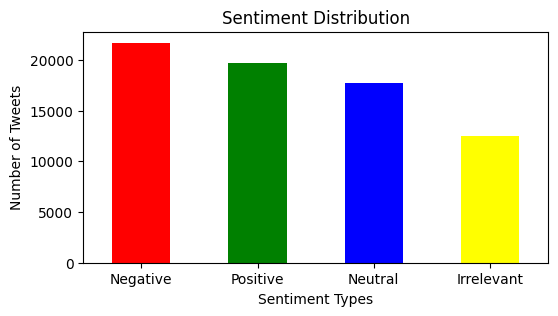

In [17]:
plt.figure(figsize=(6,3))
sentiment_counts.plot(kind='bar',color=['red','green','blue','yellow'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment Types')
plt.ylabel("Number of Tweets")
plt.xticks(rotation=0)
plt.show()

In [18]:
Entity_Sorted = df["Entity"].value_counts().sort_values(ascending = False).reset_index()

In [22]:
Entity_Sorted

,Entity,count
0,TomClancysRainbowSix,2328
1,Verizon,2319
2,MaddenNFL,2315
3,CallOfDuty,2314
4,Microsoft,2304
5,WorldOfCraft,2300
6,NBA2K,2299
7,LeagueOfLegends,2296
8,TomClancysGhostRecon,2291
9,Facebook,2289


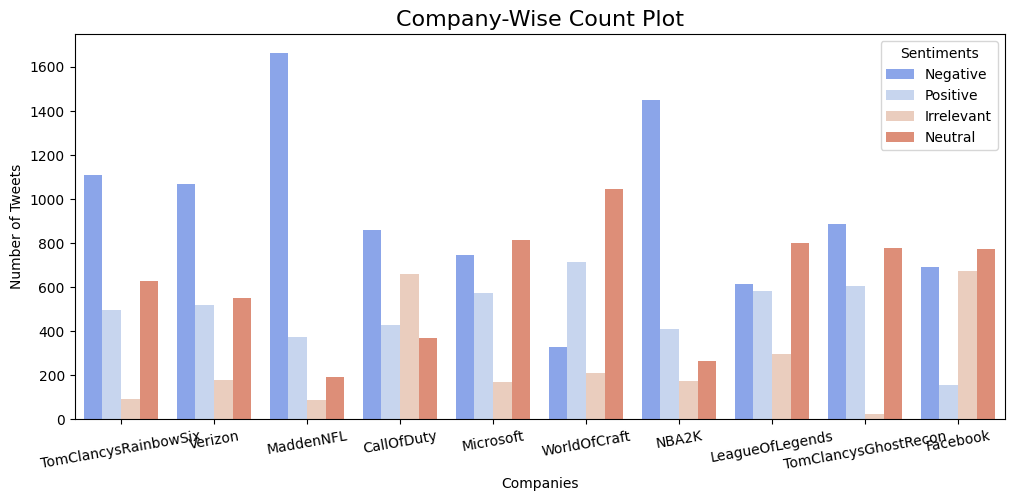

In [27]:
plt.figure(figsize=(12, 5))

merged_data = pd.merge(Entity_Sorted.head(10), df[['Entity', 'Sentiments']], on='Entity', how='left')
sns.countplot(data=merged_data, x='Entity', hue='Sentiments', palette='coolwarm')
plt.title('Company-Wise Count Plot', fontsize=16)
plt.xlabel('Companies', fontsize=10)
plt.xticks(rotation=10)
plt.ylabel('Number of Tweets', fontsize=10)

plt.show()

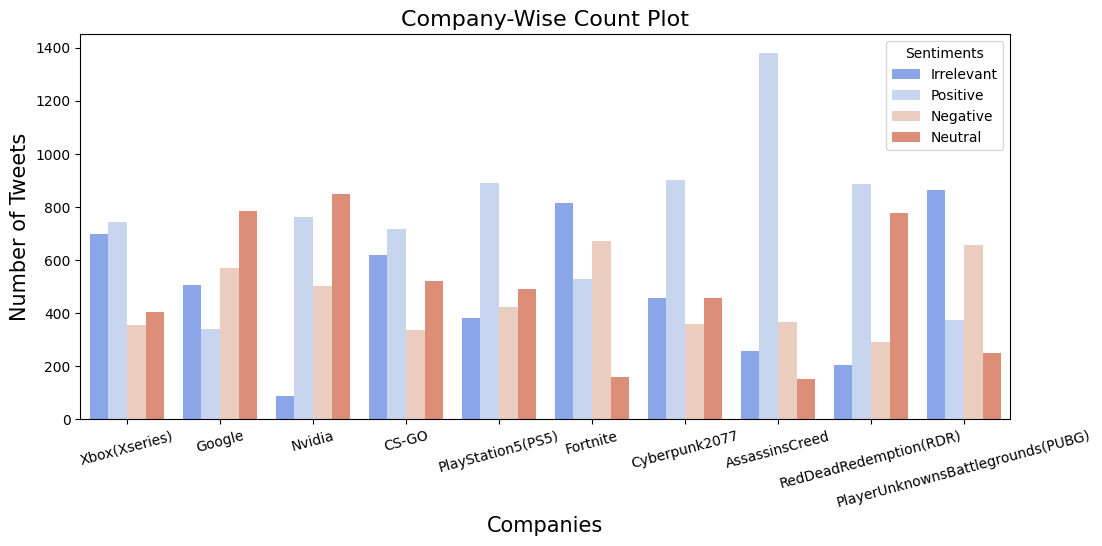

In [31]:
plt.figure(figsize=(12, 5))

merged_data = pd.merge(Entity_Sorted.tail(10), df[['Entity', 'Sentiments']], on='Entity', how='left')
sns.countplot(data=merged_data, x='Entity', hue='Sentiments', palette='coolwarm')
plt.title('Company-Wise Count Plot', fontsize=16)
plt.xlabel('Companies', fontsize=15)
plt.xticks(rotation=15)
plt.ylabel('Number of Tweets', fontsize=15)

plt.show()

In [32]:
brand_data=df[df['Entity'].str.contains('Amazon',case=False)]
brand_sentiment_counts=brand_data['Sentiments'].value_counts()
brand_sentiment_counts

,count
Sentiments,
Neutral,1197
Negative,565
Positive,302
Irrelevant,185


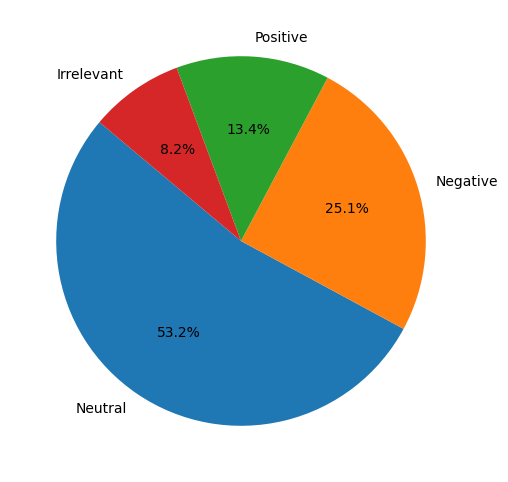

In [33]:
plt.figure(figsize=(6,6))
plt.pie(brand_sentiment_counts,labels=brand_sentiment_counts.index,autopct='%1.1f%%',startangle=140)
plt.show()